In [2]:
import csv
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

In [3]:
# Load face data
faces = np.genfromtxt('../data/faces.csv', delimiter=',')

### Get values of $\lambda_1$, $\lambda_2$, $\lambda_5$, $\lambda_{10}$, $\lambda_{50}$ and $\sum_i \lambda_i$
Hint: Documentation for [np.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

In [5]:
faces.shape

(2414, 8064)

In [10]:
cov_matrix.shape

(2414, 2414)

In [11]:
# Your code here
# Compute the mean face
#mean_face = np.mean(faces, axis=1)

# Subtract the mean face from each image
#centered_faces = faces - mean_face[:, np.newaxis]

# Compute the covariance matrix
cov_matrix = np.dot(faces.T, faces) / faces.shape[0]

# Compute eigenvalues and eigenvectors
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Sort eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Extract specific eigenvalues
lambda_1 = eigenvalues_sorted[0]
lambda_2 = eigenvalues_sorted[1]
lambda_10 = eigenvalues_sorted[9]
lambda_30 = eigenvalues_sorted[29]
lambda_50 = eigenvalues_sorted[49]

# Compute the sum of eigenvalues
sum_eigenvalues = np.sum(eigenvalues)

# Display results
print("Eigenvalues:")
print("λ1:", lambda_1)
print("λ2:", lambda_2)
print("λ10:", lambda_10)
print("λ30:", lambda_30)
print("λ50:", lambda_50)
print("Sum of eigenvalues (∑λi):", sum_eigenvalues)

Eigenvalues:
λ1: (781.8126992600027+0j)
λ2: (161.151574967327+0j)
λ10: (3.33958675488782+0j)
λ30: (0.8090877903777252+0j)
λ50: (0.38957773951814656+0j)
Sum of eigenvalues (∑λi): (1084.207434994769-1.5284180038657104e-29j)


## Plot Reconstruction Error vs k
Hint: refer to the documentation for [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

/Users/ekinokos2/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


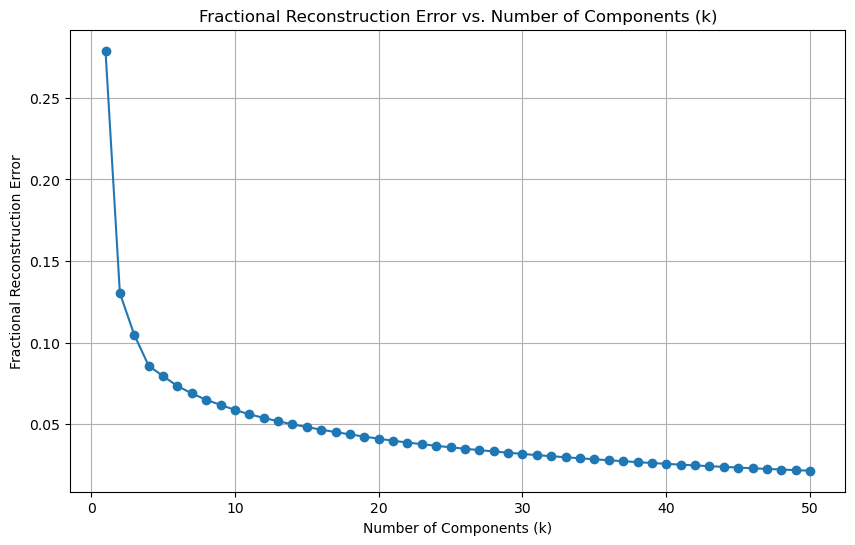

In [25]:
# Your code here
# Compute cumulative sum of eigenvalues up to each value of k
cumulative_sum = np.cumsum(eigenvalues_sorted)

# Compute fractional reconstruction error for each value of k
fractional_error = 1 - (cumulative_sum / sum_eigenvalues)

# Plot the fractional reconstruction error
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 51), fractional_error[:50], marker='o', linestyle='-')
plt.title('Fractional Reconstruction Error vs. Number of Components (k)')
plt.xlabel('Number of Components (k)')
plt.ylabel('Fractional Reconstruction Error')
plt.grid(True)
plt.show()

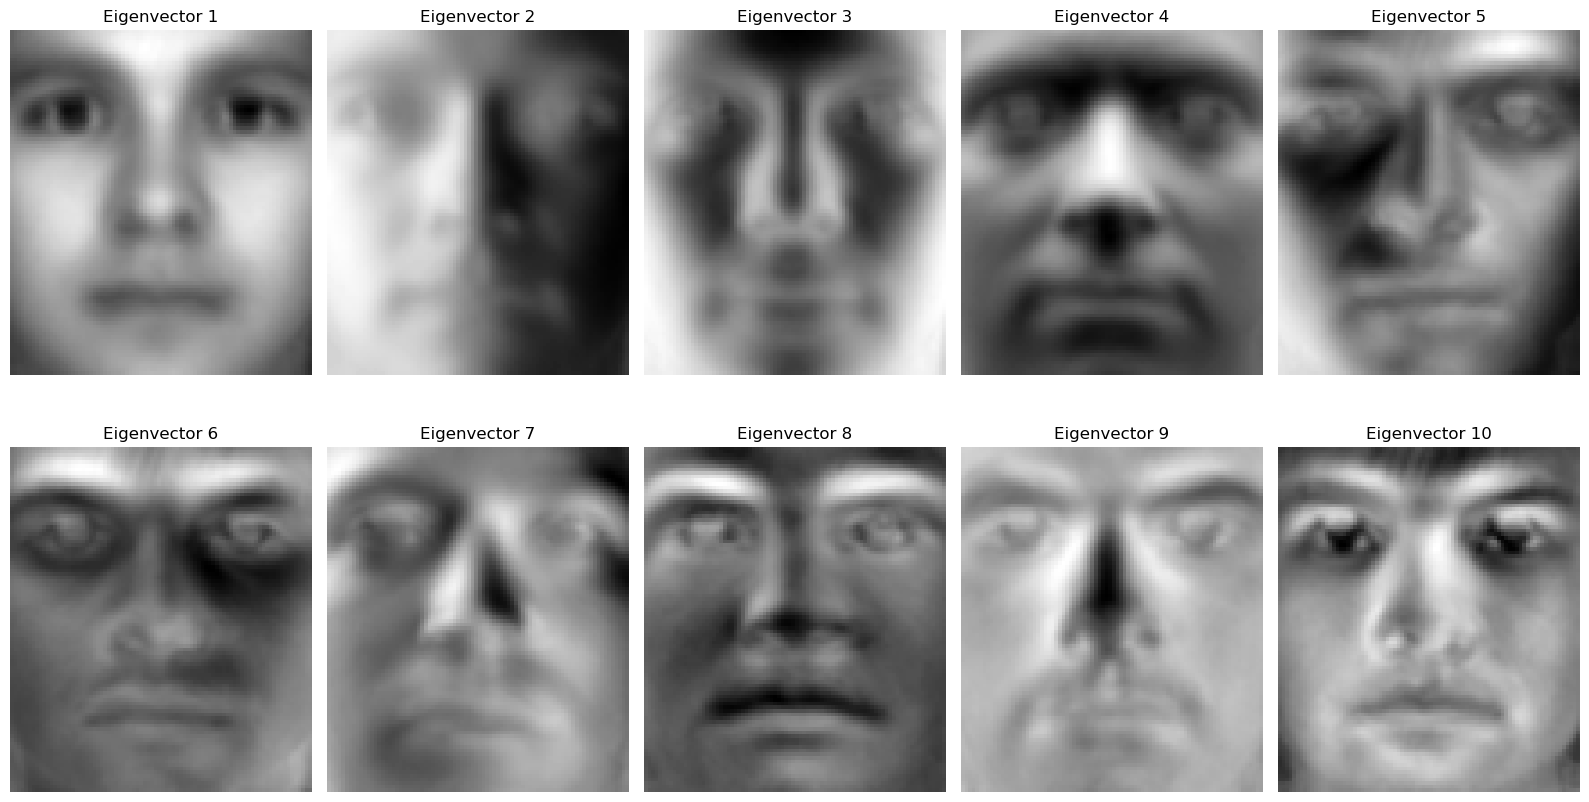

In [14]:
# Plot eigenvectors
fig, axs = plt.subplots(2,5, figsize=(16,9))

#fig = plt.subplot()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xlabel('Eigenvector '+str(i+1))
    # Your code here
    eigenvector = _
    eigenvector_image = np.real(eigenvector)[:, i].reshape((84, 96)).transpose()
    plt.imshow(eigenvector_image, cmap='gray')
    plt.title('Eigenvector {}'.format(i + 1))
    plt.axis('off')
plt.tight_layout()
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()

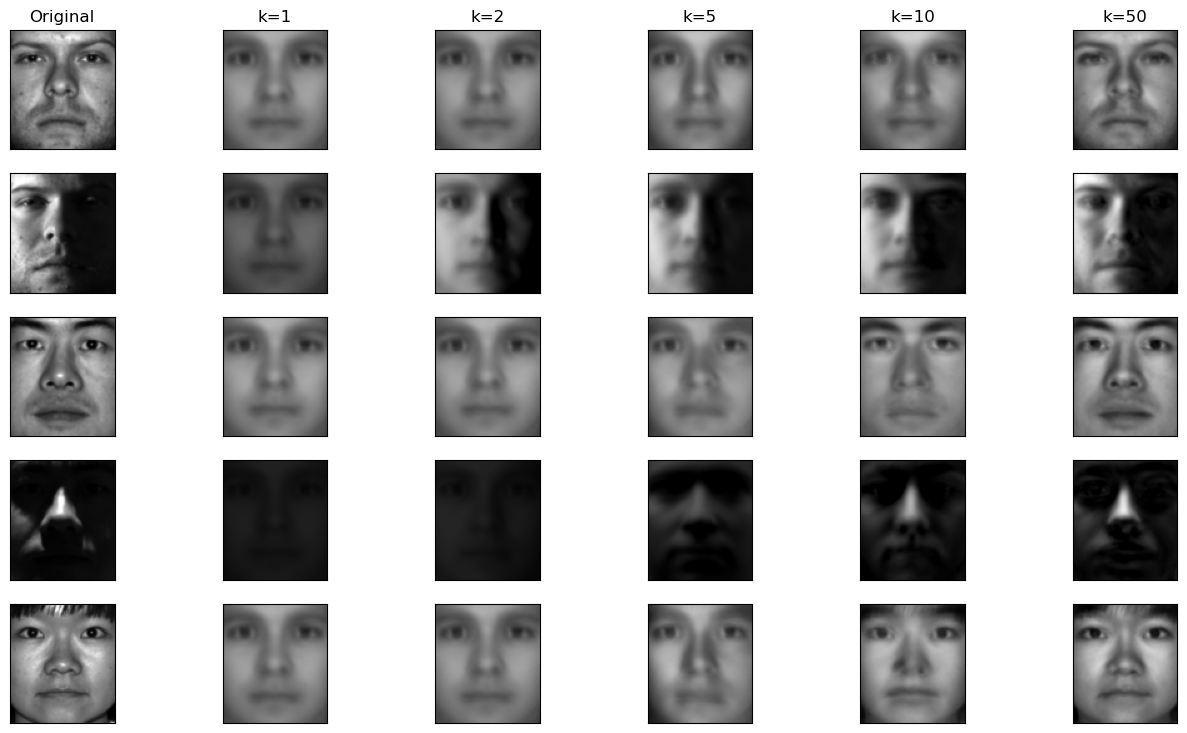

In [24]:
#d1
fig, axs = plt.subplots(5,6, figsize=(16,9))
axs[0, 0].set_title('Original')
axs[0, 1].set_title('k=1')
axs[0, 2].set_title('k=2')
axs[0, 3].set_title('k=5')
axs[0, 4].set_title('k=10')
axs[0, 5].set_title('k=50')

num_plots_made = 1
for image in [0,23,64,67,256]:
    plt.subplot(5,6,num_plots_made)
    plt.imshow(faces[image].reshape((84, 96)).transpose(), cmap='gray')
    num_plots_made+=1
    for k in [1,2,5,10,50]:
        # Your code here
        eigenvectors = _
        eigenvector_image = np.real(eigenvectors[:, :k]) @ np.real(eigenvectors[:, :k]).T @ faces[image]
        plt.subplot(5,6,num_plots_made)
        plt.imshow(eigenvector_image.reshape((84, 96)).transpose(), cmap='gray', vmin=0, vmax=1)
        
        num_plots_made+=1
        
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.show()